## Gradient Descent 

Gradient descent is an optimization technique. In this tutorial, we will learn how to implement three different gradient descent methods as shown below:
1. **Gradient Descent**
2. **Stochastic Gradient**
3. **Minibatch Gradient Descent**

The term “Gradient” refers slope. For instance, consider a person who wants come down from the top of mountain with a simple electronics gadget. Electronics gadget can measure the height of his place above sea level. So he will take many attempts in different directions and measure his height from sea level. He will move along a direction to minimize his height from sea level. It means he will learn and then move along a direction. In this example, steps size of the person represents “learning rate”, his height above sea level represents “cost function”, and his direction represents “gradients”. We can define **_Cost_ _Function_** as follows:

$$ J(\theta) = 1/{2m} \sum_i (h(\theta_i) - Y_i)^2  $$

We can define **_gradient_** as follows:

$$ \delta J(\theta)/\delta \theta_j = 1/m \sum_i (h(\theta_i) - Y_i).X_j ^{i}  $$


We can further simplify **_gradient_** as follows:

$$ \theta_0 = \theta_0 - \alpha (1/m \sum_i (h(\theta_i) - Y_i).X_j ^{i})$$
$$ \theta_1 = \theta_1 - \alpha (1/m \sum_i (h(\theta_i) - Y_i).X_j ^{i})$$

where ** $\alpha$ ** is the ** _learning_  _rate_ **

Often cost function has many ups and downs. In such case gradient descent may stuck at local optima.

Stochastic Gradient Descent is good for such problem. In gradient descent we calculate the gradient of each observation one by one, in stochastic gradient descent we can select observations randomly. It is called stochastic as samples are taken randomly.

Mini Batch Gradient Descent: It is much faster than above two. First it shuffle observations (i.e. random sampling) and then it creates batches and finally it uses standard gradient descent. 

This tutorial also shows ** _simulation_** of gradient descent.




## Ordinary Least Square 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [5]:
X = 2*np.random.rand(200,1)
y = 10 + 5*X + np.random.randn(200,1)

#### Method 1: Using Statsmodels 

In [6]:
X1 = sm.add_constant(X)
model = sm.OLS(y,X1)
reg_line = model.fit()
reg_pred = reg_line.predict()
print("Regression Line from Ordinary Least Square Method:",reg_line.params)
print("Regression Result:",reg_line.summary())

Regression Line from Ordinary Least Square Method: [ 9.88695887  5.13620061]
Regression Result:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1902.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.72e-103
Time:                        18:01:04   Log-Likelihood:                -275.61
No. Observations:                 200   AIC:                             555.2
Df Residuals:                     198   BIC:                             561.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------

#### Method 2: Using Sklearn 

In [7]:
model2 = LinearRegression()
model2_res = model2.fit(X,y)
model_pred = model2_res.predict(X)
print("Sklearn model intercept:",model2_res.intercept_," model slope:",model2_res.coef_)

Sklearn model intercept: [ 9.88695887]  model slope: [[ 5.13620061]]


#### Visualization for Method 1 and 2 

#### Method 3: Using Gradient Descent 

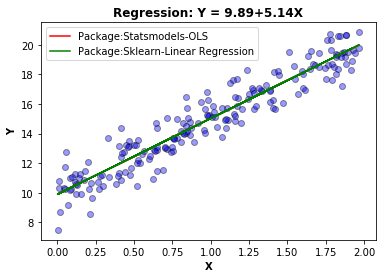

In [8]:
plt.scatter(X,y,color="b",marker="o",alpha=0.4,edgecolor="k")
plt.plot(X,reg_pred,color="r",label="Package:Statsmodels-OLS")
plt.plot(X,model_pred,color="g",label="Package:Sklearn-Linear Regression")
plt.title(f"Regression: Y = {np.round(model2_res.intercept_[0],2)}+{np.round(model2_res.coef_[0][0],2)}X",fontweight="bold")
plt.xlabel("X",fontweight="bold")
plt.ylabel("Y",fontweight="bold")
plt.legend()
plt.show()

#### Gradient Descent 

In [53]:
def cal_cost(theta,X,y):
    no_observation = len(y)
    predictions = X.dot(theta)
    cost = (1/2*no_observation) * np.sum(np.square(predictions-y))
    return cost

In [57]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    no_observation = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for iteration in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta -(1/no_observation)*learning_rate*(X.T.dot((prediction - y)))
        theta_history[iteration,:] =theta.T
        cost_history[iteration]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

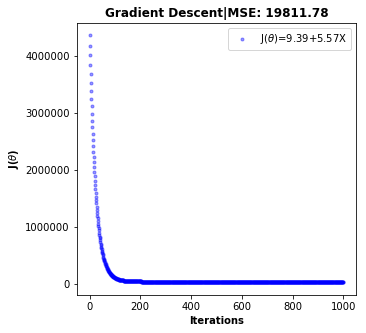

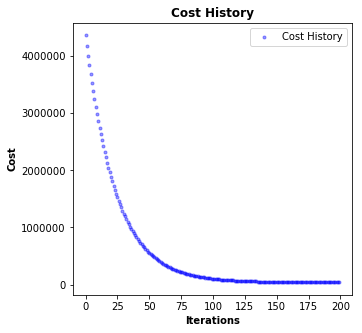

In [59]:
learning_rate =0.01
iterations = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,learning_rate,iterations)

plt.figure(figsize=(5,5))
plt.plot(range(iterations),cost_history,'b.',alpha=0.4,label=f"J($\\theta$)={np.round(theta[0][0],2)}+{np.round(theta[1][0],2)}X")
plt.ylabel('J($\\theta$)',fontweight="bold")
plt.xlabel('Iterations',fontweight="bold")
plt.title(f"Gradient Descent|MSE: {np.round(cost_history[-1],2)}",fontweight="bold")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(range(200),cost_history[:200],'b.',alpha=0.4,label="Cost History")
plt.ylabel('Cost',fontweight="bold")
plt.xlabel('Iterations',fontweight="bold")
plt.title("Cost History",fontweight="bold")
plt.legend()
plt.show()

In [67]:
#THIS FUNCTION WILL CALCULATE GRADIENT DESCENT FOR DIFFERENT VALUES OF LEARNING RATE AND ITERATIONS
#See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the 
#gradient descent starts and then slowly gets closer to the final value

def plot_GD(n_iter,lr,ax,ax1=None):
    ax.plot(X,y,'b.')
    theta = np.random.randn(2,1)

    alpha =0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            ax.plot(X,pred,'g-',alpha=alpha)
            if alpha < 0.8:
                alpha = alpha + 0.2
    if not ax1== None:
           ax1.plot(range(n_iter),cost_history,'b.',alpha=0.4)
      
        
    


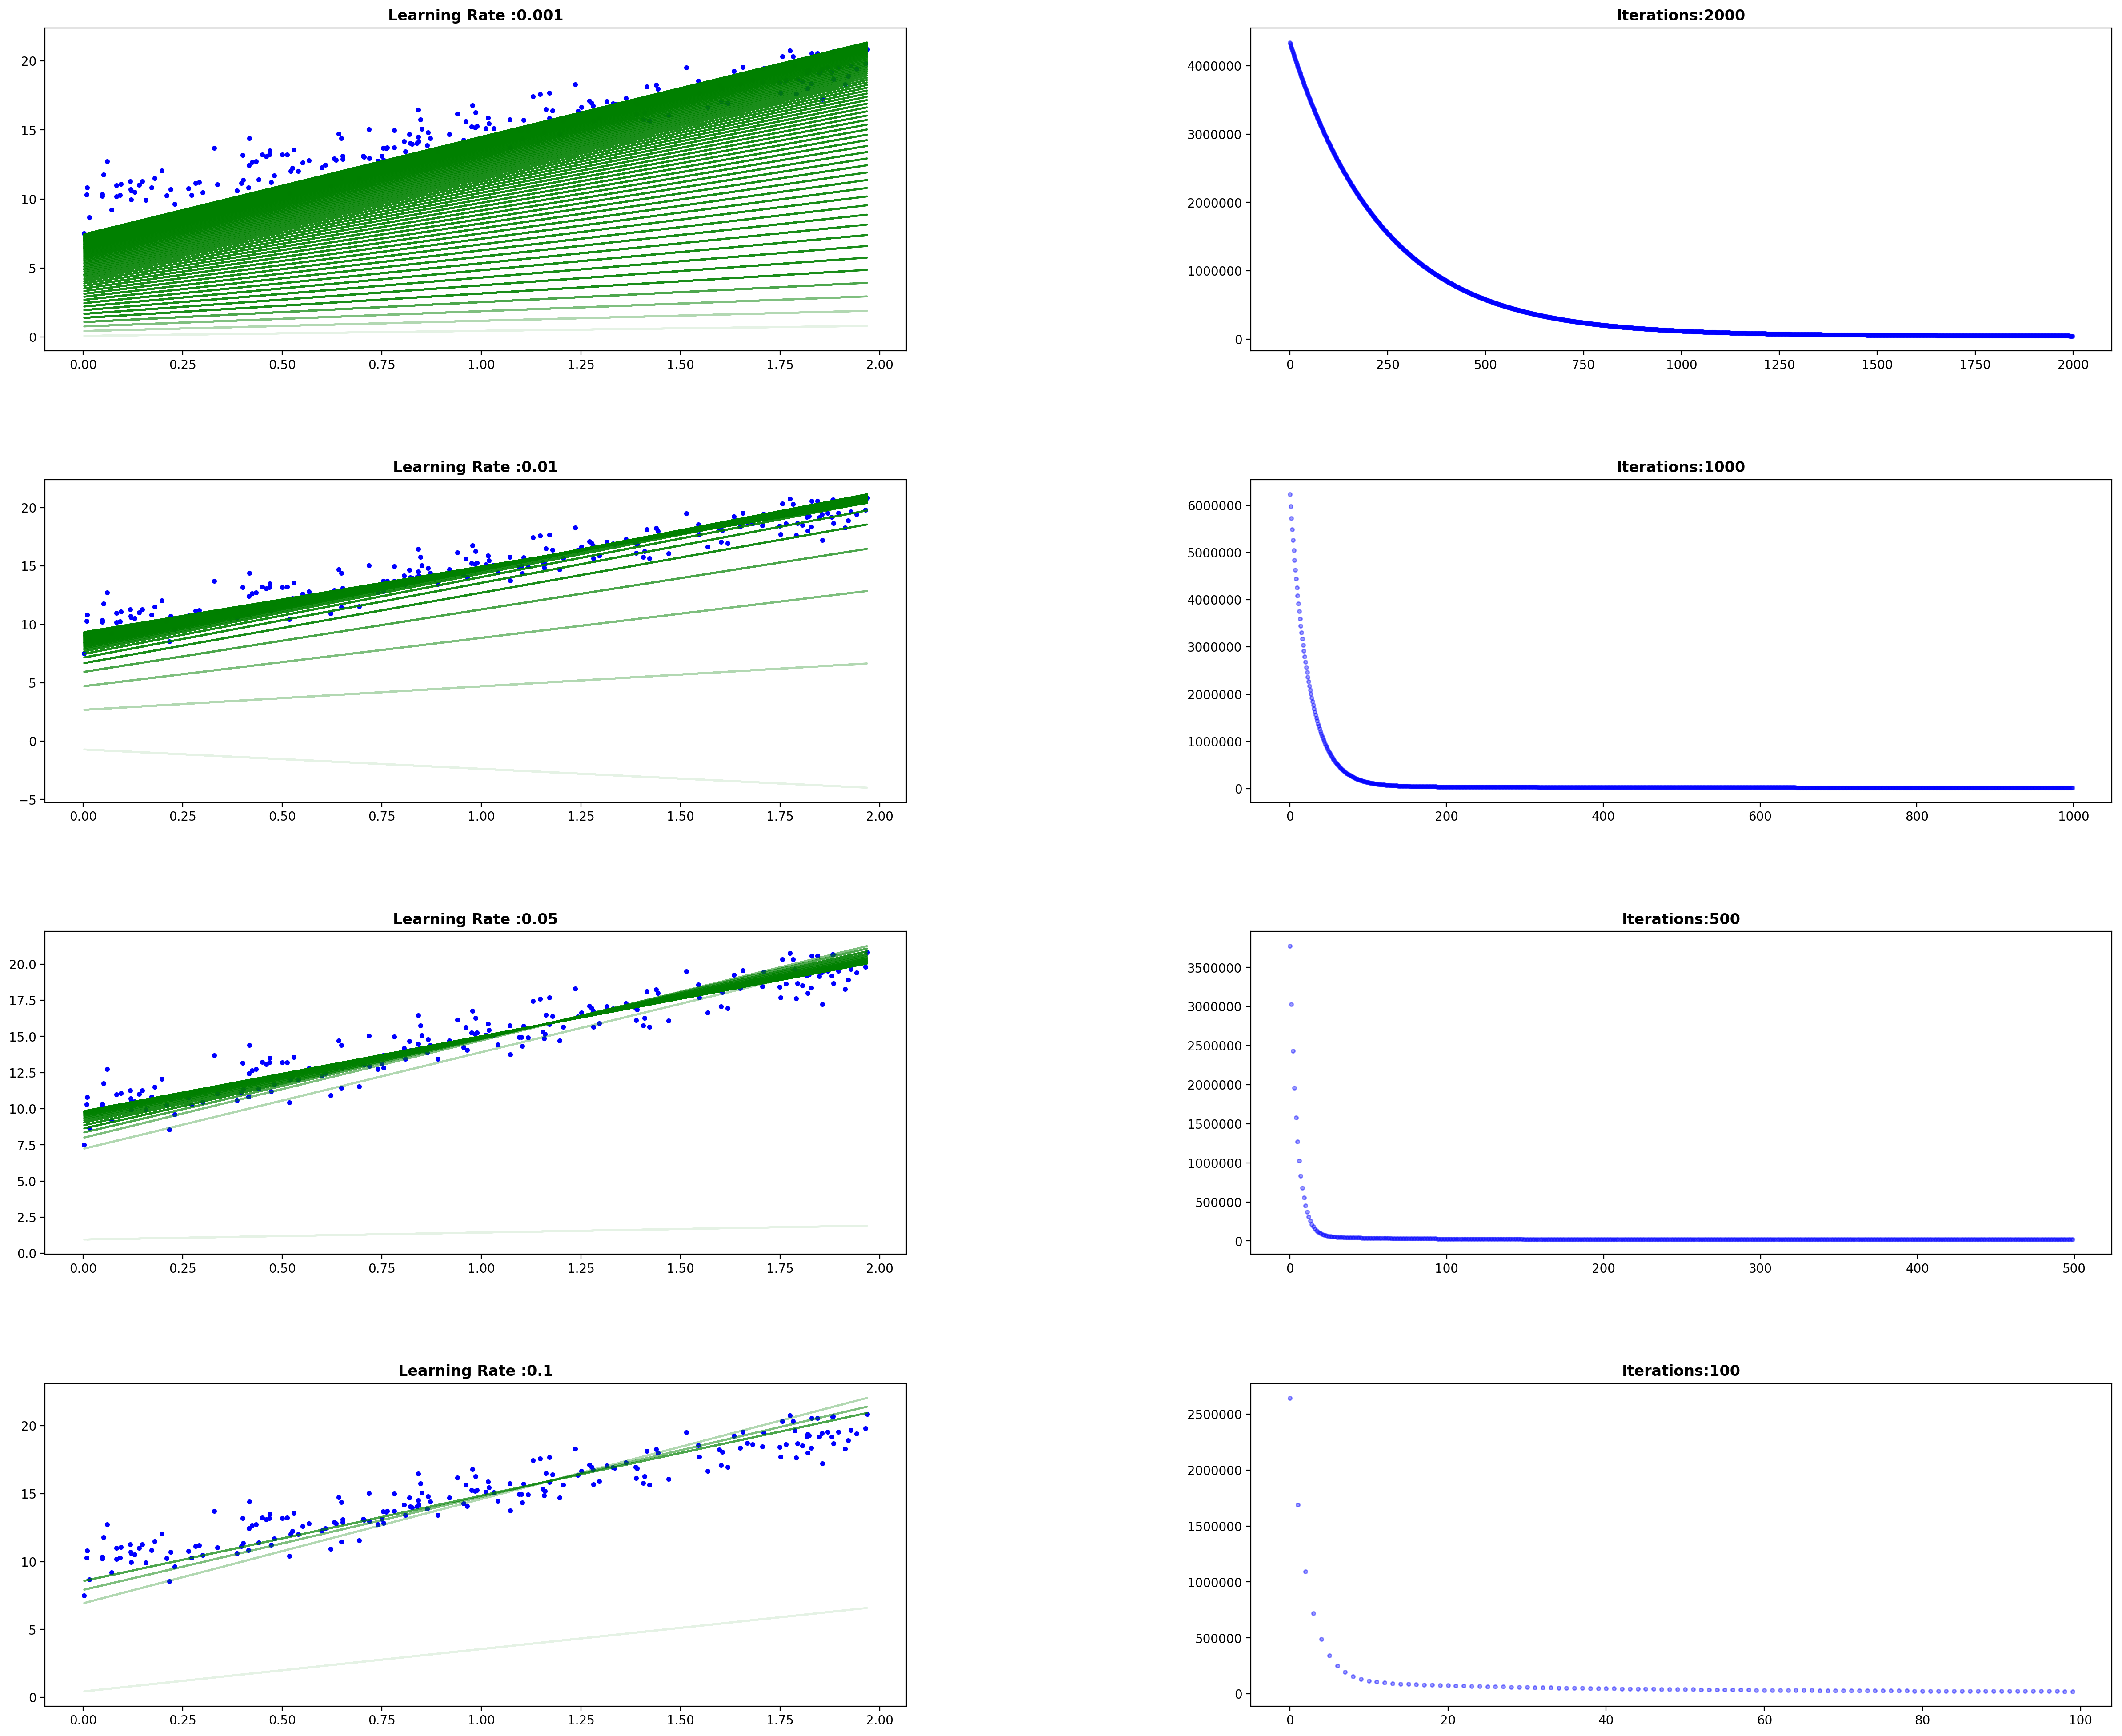

In [70]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(1000,0.01),(500,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title(f"Learning Rate :{lr}",fontweight="bold")
    ax1.set_title(f"Iterations:{n_iter}",fontweight="bold")
    plot_GD(n_iter,lr,ax,ax1)
plt.show()

#### Stochastic Gradient Descent 

In [40]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history


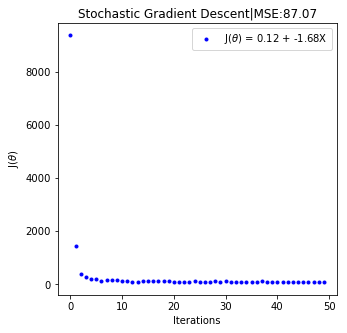

In [41]:
learning =0.5
iterations = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,learning,iterations)

fig,ax = plt.subplots(figsize=(5,5))

ax.set_ylabel('J($\\theta$)',rotation=90)
ax.set_xlabel('Iterations')
theta = np.random.randn(2,1)

ax.plot(range(n_iter),cost_history,'b.',label=f"J($\\theta$) = {np.round(theta[0][0],2)} + {np.round(theta[1][0],2)}X ")
plt.title(f"Stochastic Gradient Descent|MSE:{np.round(cost_history[-1],2)}")
plt.legend()
plt.show()


#### Minibatch Gradient Descent 

In [22]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history


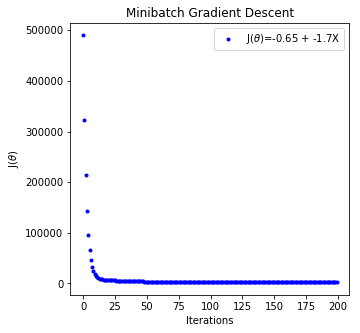

In [45]:
lr =0.1
n_iter = 200
theta = np.random.randn(2,1)
theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)
fig,ax = plt.subplots(figsize=(5,5))
ax.set_ylabel('J($\\theta$)',rotation=90)
ax.set_xlabel('Iterations')
theta = np.random.randn(2,1)
ax.plot(range(n_iter),cost_history,'b.',label=f"J($\\theta$)={np.round(theta[0][0],2)} + {np.round(theta[1][0],2)}X")
plt.title("Minibatch Gradient Descent")
plt.legend()
plt.show()

#### References:

1. Stanford Lecture Notes 